In [151]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.layers import BatchNormaliza"tion
from keras.optimizers import Adam


SyntaxError: unterminated string literal (detected at line 9) (1208352292.py, line 9)

In [3]:
import os
import shutil
from PIL import Image
from sklearn.model_selection import train_test_split

# Directories
dataset_dir = r"D:\Semester 3\Kecerdasan Buatan (CERTAN)\Week 16\Proyek\kagglehub\archive\Male and Female face dataset"
train_dir = r"D:\\Semester 3\\Kecerdasan Buatan (CERTAN)\\Week 16\\Proyek\\train"
test_dir = r"D:\\Semester 3\\Kecerdasan Buatan (CERTAN)\\Week 16\\Proyek\\test"

# Create train and validation folders
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Categories (e.g., 'man', 'woman', 'unknown')
categories = ['man', 'woman']

# Minimum size requirement
min_width, min_height = 65, 65

# Process each category
for category in categories:
    category_path = os.path.join(dataset_dir, category)
    if not os.path.exists(category_path):
        print(f"Category folder '{category}' does not exist in the dataset directory. Skipping...")
        continue
    
    images = os.listdir(category_path)
    
    # Filter images by size
    valid_images = []
    for image_name in images:
        image_path = os.path.join(category_path, image_name)
        try:
            with Image.open(image_path) as img:
                width, height = img.size
                if width >= min_width and height >= min_height:
                    valid_images.append(image_name)
        except Exception as e:
            print(f"Error processing image {image_name}: {e}")
    
    # Split the valid images into train and validation sets
    train_images, test_images = train_test_split(valid_images, test_size=0.2, random_state=42)
    
    # Create category folders in train and validation directories
    train_category_path = os.path.join(train_dir, category)
    test_category_path = os.path.join(test_dir, category)
    os.makedirs(train_category_path, exist_ok=True)
    os.makedirs(test_category_path, exist_ok=True)
    
    # Copy train images
    for image in train_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(train_category_path, image))
    
    # Copy validation images
    for image in test_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(test_category_path, image))

print("Dataset has been filtered and divided into Train and Validation sets.")


Dataset has been filtered and divided into Train and Validation sets.


In [153]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,  # Rotasi gambar
    width_shift_range=0.2,  # Perpindahan horizontal
    height_shift_range=0.2,  # Perpindahan vertikal
    shear_range=0.2,  # Distorsi shearing
    zoom_range=0.2,  # Zoom in dan zoom out
    horizontal_flip=True,  # Membalik gambar secara horizontal
    fill_mode='nearest'  # Menangani area kosong akibat augmentasi
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

In [155]:
batch_size = 64
target_size = (64, 64)
input_shape=(64, 64, 3)
seed=1337
adam = 0.001
fre= -20
FC = 2048
E = 1
patience = 8
verbose = 1
factor = 0.50
min_lr = 0.01
steps_per_epoch=128
validation_steps=128
epochs=10

In [157]:
train_generator = train_datagen.flow_from_directory(
    'D:\\Semester 3\\Kecerdasan Buatan (CERTAN)\\Week 16\\Proyek\\train',
    batch_size=batch_size,
    class_mode='binary',
    seed=seed,
    target_size=target_size
)

test_generator = test_datagen.flow_from_directory(
    'D:\\Semester 3\\Kecerdasan Buatan (CERTAN)\\Week 16\\Proyek\\test',
    batch_size=batch_size,
    class_mode='binary',
    seed=seed,
    target_size=target_size
)


Found 4352 images belonging to 2 classes.
Found 1088 images belonging to 2 classes.


In [159]:
base_model = tf.keras.applications.VGG16(input_shape=input_shape,include_top=False,weights="imagenet")

In [161]:
# Freezing Layers

for layer in base_model.layers[:fre]:
    layer.trainable=False

In [163]:
# Building Model
model=Sequential()
model.add(base_model)
model.add(layers.Dropout(.2))

model.add(Conv2D(128, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,strides=(2,2), padding='same'))
model.add(layers.Dropout(.1))
model.add(Conv2D(128,(3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,strides=(2,2), padding='same'))

model.add(layers.Dropout(.1))
model.add(Conv2D(96, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,strides=(2,2), padding='same'))

model.add(layers.Dropout(.1))
model.add(Conv2D(96, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,strides=(2,2), padding='same'))

model.add(layers.Dropout(.1))
model.add(Conv2D(64, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,strides=(2,2), padding='same'))

model.add(layers.Dropout(.1))
model.add(Conv2D(64, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,strides=(2,2), padding='same'))

model.add(layers.Dropout(.1))
model.add(Conv2D(32, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,strides=(2,2), padding='same'))



# Add new layers
model.add(Flatten())
model.add(Dense(FC , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(FC , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(FC, activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(E, activation='sigmoid'))

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_123 (Dropout)                │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_87 (Conv2D)                   │ (None, 2, 2, 128)           │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_85               │ (None, 2, 2, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_124 (Dropout)                │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_88 (Conv2D)                   │ (None, 1, 1, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_86               │ (None, 1, 1, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_125 (Dropout)                │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_89 (Conv2D)                   │ (None, 1, 1, 96)            │         110,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_87               │ (None, 1, 1, 96)            │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 1, 1, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_126 (Dropout)                │ (None, 1, 1, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_90 (Conv2D)                   │ (None, 1, 1, 96)            │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_88               │ (None, 1, 1, 96)            │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 1, 1, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_127 (Dropout)                │ (None, 1, 1, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_91 (Conv2D)                   │ (None, 1, 1, 64)            │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,221,473 (92.40 MB)

 Trainable params: 24,220,257 (92.39 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [165]:
# Callback untuk pelatihan
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# Callback untuk menurunkan learning rate secara adaptif
lrd = ReduceLROnPlateau(
    monitor='val_loss',
    patience=patience,
    verbose=verbose,
    factor=factor,
    min_lr=min_lr
)

# Callback untuk menyimpan model terbaik selama pelatihan
mcp = ModelCheckpoint(
    'model.keras',  # Format terbaru untuk file model
    monitor='val_loss',
    save_best_only=True,
    verbose=verbose
)

# Callback untuk menghentikan pelatihan lebih awal jika tidak ada peningkatan
es = EarlyStopping(
    verbose=verbose,
    patience=patience
)


In [167]:
from PIL import Image

# Buka gambar
try:
    with Image.open(image_path) as img:
        # Jika gambar dalam mode 'P' (palette), ubah menjadi 'RGBA'
        if img.mode == 'P':
            img = img.convert('RGBA')
        
        width, height = img.size
        if width >= min_width and height >= min_height:
            valid_images.append(image_name)
except Exception as e:
    print(f"Error processing image {image_name}: {e}")


In [169]:
import tensorflow as tf

model.compile(
    optimizer='adam',                # Pilihan optimizer (misal: 'adam', 'sgd', dll.)
    loss='binary_crossentropy',      # Fungsi loss (ubah sesuai kebutuhan)
    metrics=['accuracy']             # Metrik evaluasi
)

# Konversi generator menjadi tf.data.Dataset
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, *train_generator.image_shape), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.float32)
    )
).repeat()

validation_dataset = tf.data.Dataset.from_generator(
    lambda: test_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, *test_generator.image_shape), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.float32)
    )
).repeat()

hist = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=epochs,
    callbacks=[lrd, mcp, es]
)


Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5180 - loss: 0.7254
Epoch 1: val_loss improved from inf to 0.69317, saving model to model.keras
128/128 ━━━━━━━━━━━━━━━━━━━━ 761s 6s/step - accuracy: 0.5179 - loss: 0.7253 - val_accuracy: 0.5004 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5098 - loss: 0.6958
Epoch 2: val_loss did not improve from 0.69317
128/128 ━━━━━━━━━━━━━━━━━━━━ 744s 6s/step - accuracy: 0.5098 - loss: 0.6958 - val_accuracy: 0.5001 - val_loss: 0.6934 - learning_rate: 0.0010
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5310 - loss: 0.6890
Epoch 3: val_loss did not improve from 0.69317
128/128 ━━━━━━━━━━━━━━━━━━━━ 740s 6s/step - accuracy: 0.5312 - loss: 0.6889 - val_accuracy: 0.5006 - val_loss: 1.0640 - learning_rate: 0.0010
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6295 - loss: 0.6523
Epoch 4: val_loss did not improve from 0.69317
128/128 ━━━━━━━━━

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

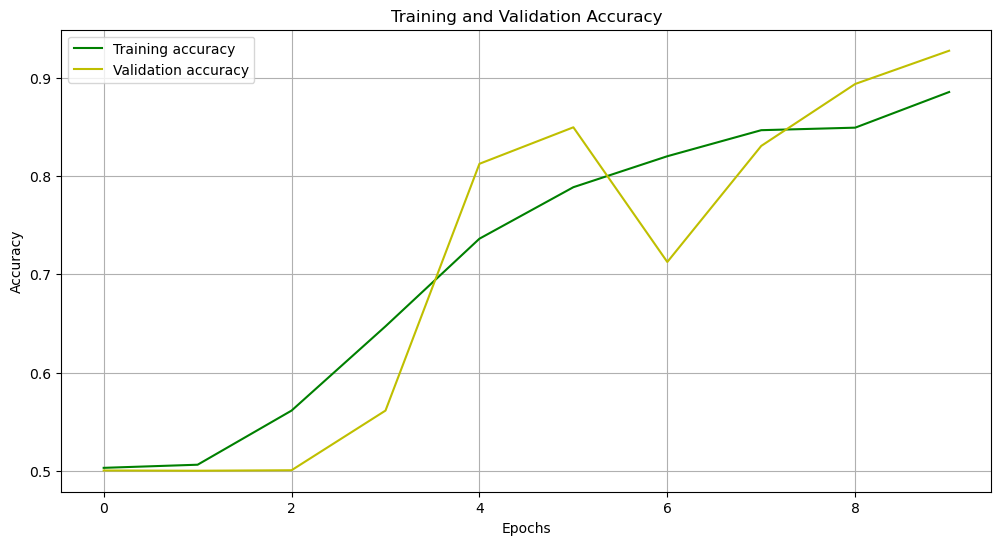

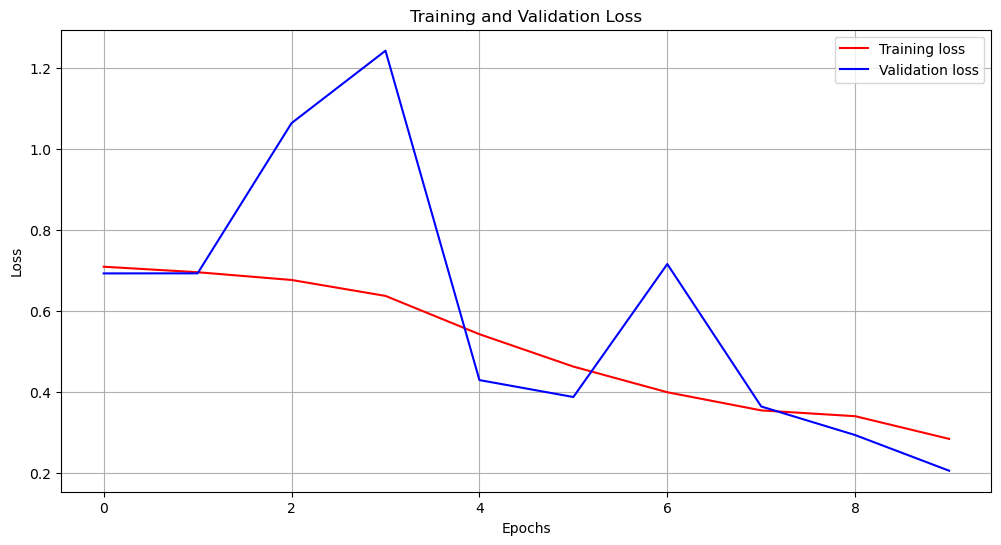

In [172]:
import matplotlib.pyplot as plt

# Data
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[0.44787005]
This is a male


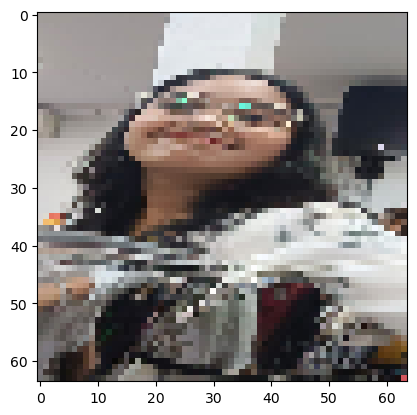

In [202]:
import numpy as np

from keras.preprocessing import image
#  images test 1
path_testmodel = r"D:\Semester 3\Kecerdasan Buatan (CERTAN)\Week 16\Proyek\uji coba\WhatsApp Image 2024-11-03 at 09.50.56_1fb1d2ea.jpg"
imge = image.load_img(path_testmodel, target_size=target_size)
X = image.img_to_array(imge) / 255.0  # Scale the input image
X = np.expand_dims(X, axis=0)

images = np.vstack([X])
classes = model.predict(X, batch_size=1)
print(classes[0])
if classes[0]<0.5:
    print("This is a male")
else:
    print( "This  is a female")
plt.imshow(imge)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[0.05099379]
This is a male


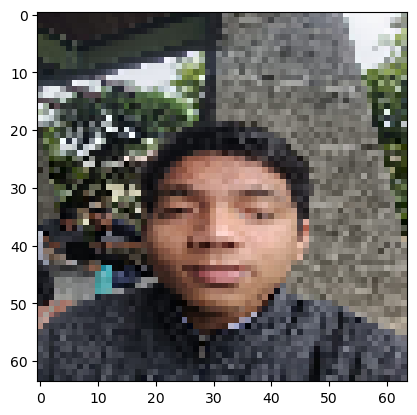

In [180]:
import numpy as np

from keras.preprocessing import image
#  images test 1
path_testmodel = r"D:\Semester 3\Kecerdasan Buatan (CERTAN)\Week 16\Proyek\uji coba\WhatsApp Image 2024-12-09 at 09.43.47_41558e4e.jpg"
imge = image.load_img(path_testmodel, target_size=target_size)
X = image.img_to_array(imge) / 255.0  # Scale the input image
X = np.expand_dims(X, axis=0)

images = np.vstack([X])
classes = model.predict(X, batch_size=1)
print(classes[0])
if classes[0]<0.5:
    print("This is a male")
else:
    print( "This  is a female")
plt.imshow(imge)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[0.8890847]
This  is a female


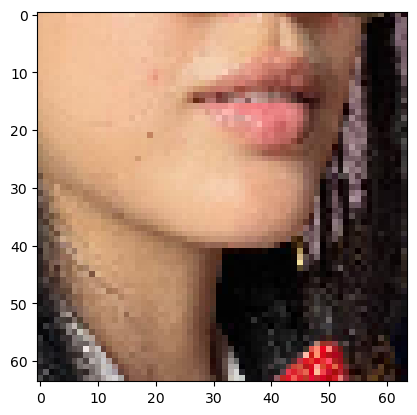

In [182]:
import numpy as np

from keras.preprocessing import image
#  images test 1
path_testmodel = r"D:\Semester 3\Kecerdasan Buatan (CERTAN)\Week 16\Proyek\uji coba\WhatsApp Image 2024-12-09 at 09.37.20_48de4aad.jpg"
imge = image.load_img(path_testmodel, target_size=target_size)
X = image.img_to_array(imge) / 255.0  # Scale the input image
X = np.expand_dims(X, axis=0)

images = np.vstack([X])
classes = model.predict(X, batch_size=1)
print(classes[0])
if classes[0]<0.5:
    print("This is a male")
else:
    print( "This  is a female")
plt.imshow(imge)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[0.76224893]
This  is a female


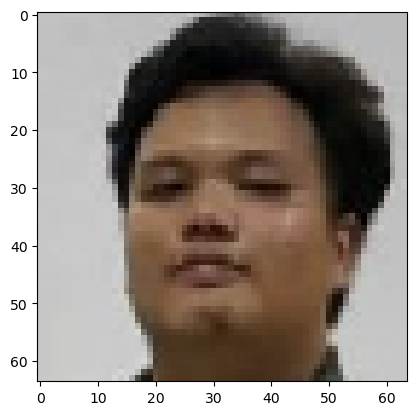

In [190]:
import numpy as np

from keras.preprocessing import image
#  images test 1
path_testmodel = r"D:\Semester 3\Kecerdasan Buatan (CERTAN)\Week 16\Proyek\uji coba\WhatsApp Image 2024-12-09 at 22.04.01_2d9cdd59.jpg"
imge = image.load_img(path_testmodel, target_size=target_size)
X = image.img_to_array(imge) / 255.0  # Scale the input image
X = np.expand_dims(X, axis=0)

images = np.vstack([X])
classes = model.predict(X, batch_size=1)
print(classes[0])
if classes[0]<0.5:
    print("This is a male")
else:
    print( "This  is a female")
plt.imshow(imge)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[0.9214807]
This  is a female


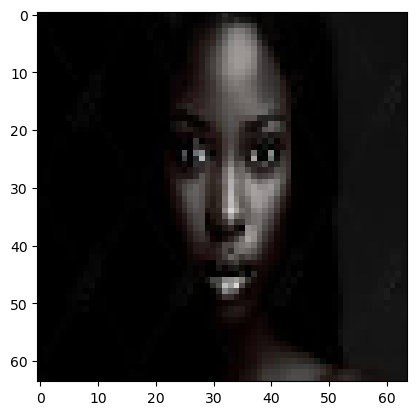

In [194]:
import numpy as np

from keras.preprocessing import image
#  images test 1
path_testmodel = r"D:\Semester 3\Kecerdasan Buatan (CERTAN)\Week 16\Proyek\uji coba\images.jpg"
imge = image.load_img(path_testmodel, target_size=target_size)
X = image.img_to_array(imge) / 255.0  # Scale the input image
X = np.expand_dims(X, axis=0)

images = np.vstack([X])
classes = model.predict(X, batch_size=1)
print(classes[0])
if classes[0]<0.5:
    print("This is a male")
else:
    print( "This  is a female")
plt.imshow(imge)